# Problem Statement
   ### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

   ### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study
### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1 :- Importing the data 

In [241]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [242]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step-2 Inspecting the Dataframe

In [243]:
leads.shape

(9240, 37)

#### There are 9240 rows and 37 column in leads data

In [244]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [245]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Looks like there are lots of null values present in this dataframe

# Step 3 - Data cleaning and preparation 


#### Handling null values and removing those which are more than 40% 

In [246]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [247]:
pd.set_option('display.max_columns', 500)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### There are some columns in which imputation is done by using "select"
   #### So we are considering select as null values

In [248]:
leads = leads.replace('Select', np.nan)

#### Looking at the null values again

In [249]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [250]:
leads.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile' 
            , 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
            'Asymmetrique Profile Score' ], axis=1, inplace= True)

In [251]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [252]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Now there are 29 columns present in which some columns have nUll values still present

### Imputing null values 

In [253]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### India is imputed in this coulumns so many times so we are imputing null values of this columns as "India"

In [254]:
leads.Country.fillna('India', inplace=True)

In [255]:
leads.Country.value_counts()/len(leads)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

#### About 96% of the value is "India" in this columns so we are considering 
#### everyone resides in 'India' and dropping this column

In [256]:
leads.drop('Country',axis=1, inplace=True)

In [257]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Checking city values

In [258]:
leads.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [259]:
leads.City.fillna('Mumbai', inplace=True)

In [260]:
leads.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

#### 74% of data is mumbai in this column so we are keeping this one

In [261]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [262]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [263]:
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [264]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [265]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [266]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Grouping all the managment specialization into one

In [267]:
leads['Specialization']=leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management'
                                                       ,'Operations Management', 'IT Projects Management', 'Supply Chain Management'
                                                       ,'Healthcare Management', 'Hospitality Management', 'Retail Management'],'Managment')
leads['Specialization']=leads['Specialization'].replace(['International Business','E-COMMERCE','Rural and Agribusiness'
                                                         ,'E-Business','Services Excellence'],'others')

In [268]:
leads['Specialization'].value_counts(dropna=False)

Managment                            4253
NaN                                  3380
others                                460
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
Name: Specialization, dtype: int64

In [269]:
leads['Specialization'].fillna('Not Specified', inplace=True)

In [270]:
leads['Specialization'].value_counts(normalize=True)

Managment                            0.460281
Not Specified                        0.365801
others                               0.049784
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
Name: Specialization, dtype: float64

In [271]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [272]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [273]:
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [274]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

#### Since 99 % of the value of the column "What matters most to you in choosing a course" is "Better Career Prospects"
#### so we are dropping this column by assuming that everyone wants to enroll for Better career prospects

In [275]:
leads.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [276]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [277]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### Grouping low frequency Tags into one

In [278]:
leads['Tags']=leads['Tags'].replace(['Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education'
                                     , 'Interested  in full time MBA', 'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)'
                                     ,'wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others',
                                     'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP',
                                     'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized'
                                     ,'Recognition issue (DEC approval)'],'other reason')

In [279]:
leads['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
other reason                           1634
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [280]:
leads['Tags'].fillna('Not Specified', inplace=True)

In [281]:
leads['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
other reason                           1634
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [282]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [283]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [284]:
leads['Lead Source'].fillna('Google', inplace=True)

#### Grouping low frequency "Lead Source into one"

In [285]:
leads['Lead Source']=leads['Lead Source'].replace(['Referral Sites','Facebook','bing','google','Click2call','Press_Release'
                                                   ,'Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads'
                                                   ,'welearnblog_Home','WeLearn','blog','NC_EDM'],'other source')

In [286]:
leads['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
other source         208
Welingak Website     142
Name: Lead Source, dtype: int64

In [287]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [288]:
leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [289]:
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

#### Dropping the column 'Page Views Per Visit' because this one is same as "Total visit" column

In [290]:
leads.drop('Page Views Per Visit',axis=1, inplace=True)

In [291]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

#### Since very less null value is present so we are dropping all the 
#### null values at one because it will not affect our model 

In [292]:
leads=leads.dropna()

In [293]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

# Grouping all the low frequency variables into one columns by columns
# and dropping some more columns which is of no use

In [294]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64

In [295]:
leads.drop(['Do Not Email'],axis=1, inplace=True)

In [296]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [297]:
leads.drop(['Do Not Call'],axis=1, inplace=True)

In [298]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [299]:
leads['Last Activity']=leads['Last Activity'].replace(['Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website'
                                                      ,'Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked'
                                                      ,'Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                      ,'Resubscribed to emails'],'other')

In [300]:
leads['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2738
other                      1316
Olark Chat Conversation     972
Page Visited on Website     640
Name: Last Activity, dtype: int64

In [301]:
leads['Search'].value_counts(normalize=True)

No     0.998462
Yes    0.001538
Name: Search, dtype: float64

In [302]:
leads.drop(['Search'],axis=1, inplace=True)

In [303]:
leads.isnull().sum()/len(leads)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                    

In [304]:
leads['Magazine'].value_counts()

No    9103
Name: Magazine, dtype: int64

In [305]:
leads.drop(['Magazine'],axis=1, inplace=True)

In [306]:
leads['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [307]:
leads.drop(['Newspaper Article'],axis=1, inplace=True)

In [308]:
leads['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [309]:
leads.drop(['X Education Forums'],axis=1, inplace=True)

In [310]:
leads['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [311]:
leads.drop(['Newspaper'],axis=1, inplace=True)

In [312]:
leads['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [313]:
leads.drop(['Digital Advertisement'],axis=1, inplace=True)

In [314]:
leads['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [315]:
leads.drop(['Through Recommendations'],axis=1, inplace=True)

In [316]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [317]:
leads.drop(['Receive More Updates About Our Courses'],axis=1, inplace=True)

In [318]:
leads['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [319]:
leads.drop(['Update me on Supply Chain Content'],axis=1, inplace=True)

In [320]:
leads['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [321]:
leads.drop(['Get updates on DM Content'],axis=1, inplace=True)

In [322]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [323]:
leads.drop(['I agree to pay the amount through cheque'],axis=1, inplace=True)

In [324]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [325]:
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [326]:
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Olark Chat Conversation','Email Link Clicked'
                                                                      ,'Email Bounced','Unsubscribed','Unreachable'
                                                                      ,'Had a Phone Conversation','Email Marked Spam'
                                                                      ,'Approached upfront','Resubscribed to emails'
                                                                      ,'View in browser link Clicked','Form Submitted on Website'
                                                                      ,'Email Received'],'others')

In [327]:
leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
others                      516
Page Visited on Website     318
Name: Last Notable Activity, dtype: int64

In [328]:
leads.isnull().sum()/len(leads)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [329]:
varlist=['Lead Origin', 'Lead Source', 'Converted','TotalVisits', 'Total Time Spent on Website','Last Activity',
        'Specialization', 'What is your current occupation','Tags','City','A free copy of Mastering The Interview',
         'Last Notable Activity']

for i in varlist:
    print(leads[i].value_counts(normalize=True)*100)
    print('   ')

Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64
   
Google              31.824673
Direct Traffic      27.935845
Olark Chat          19.257388
Organic Search      12.677139
Reference            4.866528
other source         2.021312
Welingak Website     1.417115
Name: Lead Source, dtype: float64
   
0    61.979567
1    38.020433
Name: Converted, dtype: float64
   
0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0  

# Univariate Analysis 

## Categorical Variable

In [330]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

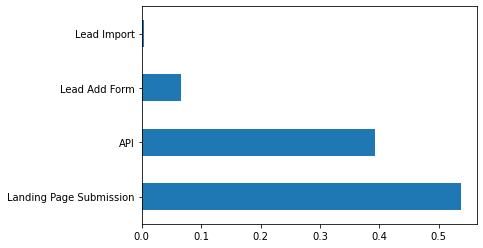

In [331]:
leads['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

### We got the lots of leads by Page submissions

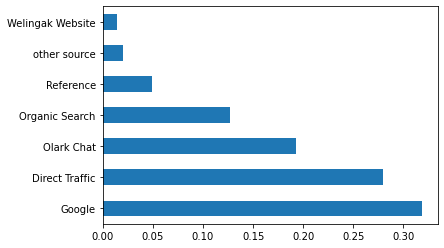

In [332]:
leads['Lead Source'].value_counts(normalize=True).plot.barh()
plt.show()

### Most of the leads came from Google 

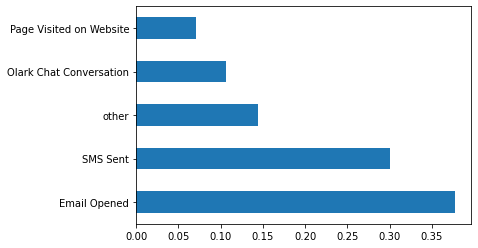

In [333]:
leads['Last Activity'].value_counts(normalize=True).plot.barh()
plt.show()

### Through E-mails and SMS we get in touch with the customers

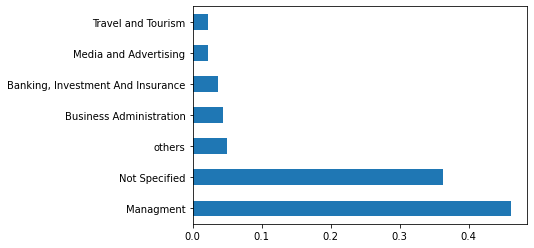

In [334]:
leads['Specialization'].value_counts(normalize=True).plot.barh()
plt.show()

### Most of the customers who we just connected are interested in Managment Specialization

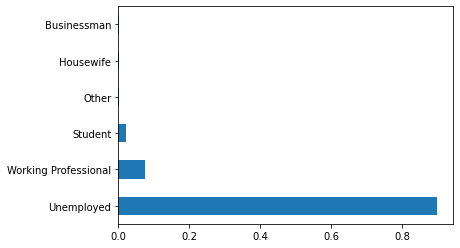

In [335]:
leads['What is your current occupation'].value_counts(normalize=True).plot.barh()
plt.show()

### approx 85% of the customers are unemployed

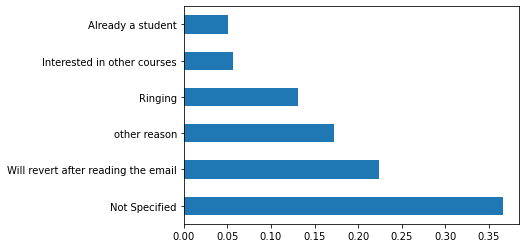

In [336]:
leads['Tags'].value_counts(normalize=True).plot.barh()
plt.show()

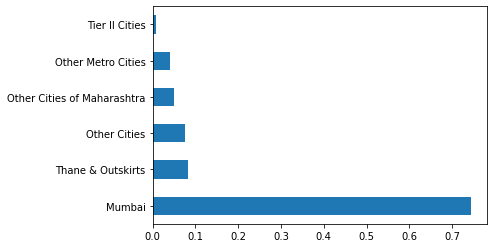

In [337]:
leads['City'].value_counts(normalize=True).plot.barh()
plt.show()

### Most of the leads came from Mumbai

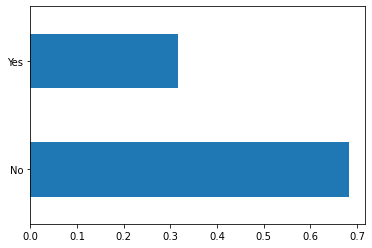

In [338]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True).plot.barh()
plt.show()

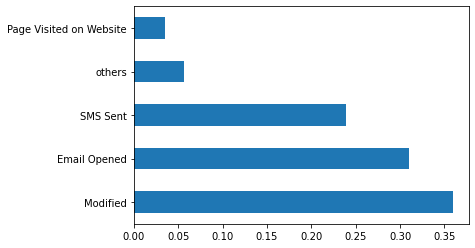

In [339]:
leads['Last Notable Activity'].value_counts(normalize=True).plot.barh()
plt.show()

## Numerical Variable

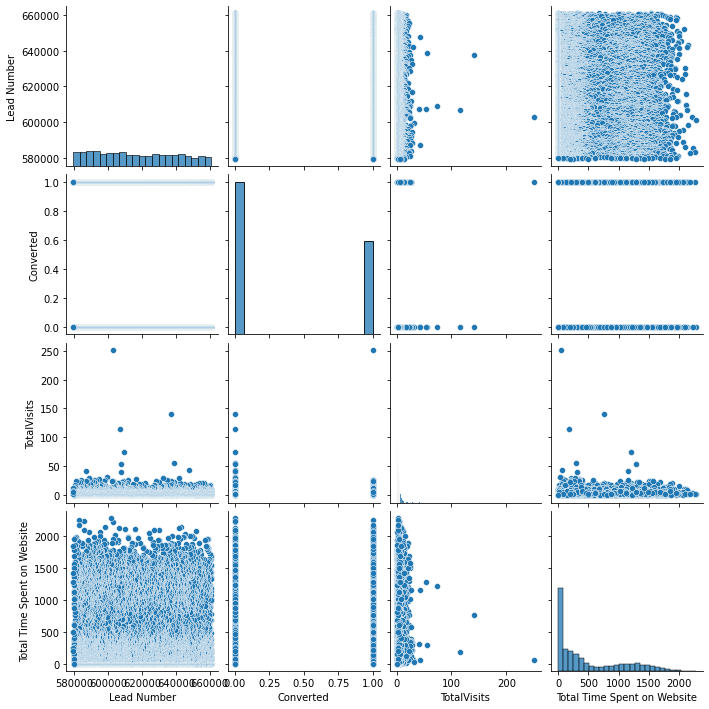

In [340]:
sns.pairplot(leads)
plt.show()

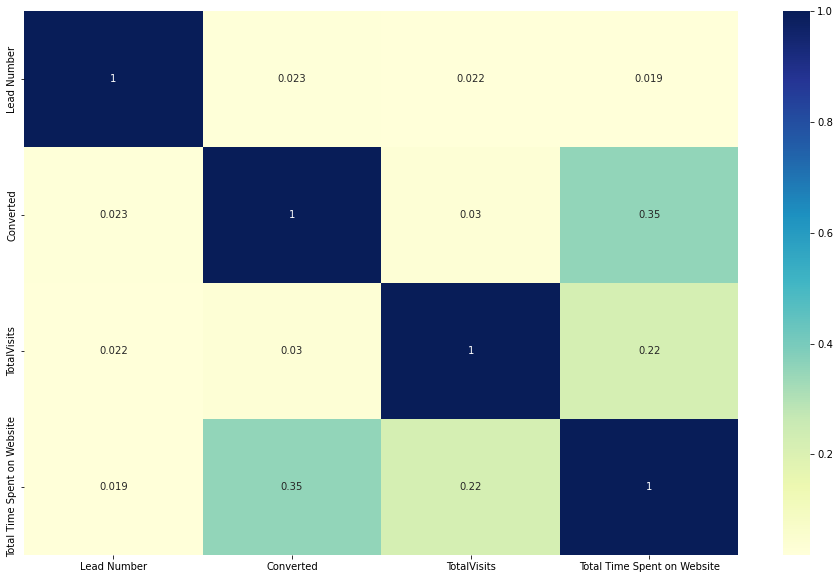

In [341]:
plt.figure(figsize = (16, 10))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()